# Decision Tree-2

You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

#### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [24]:
df=pd.read_csv('new_diabetes.csv')

In [25]:
df.shape

(768, 9)

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [32]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())


<AxesSubplot:>

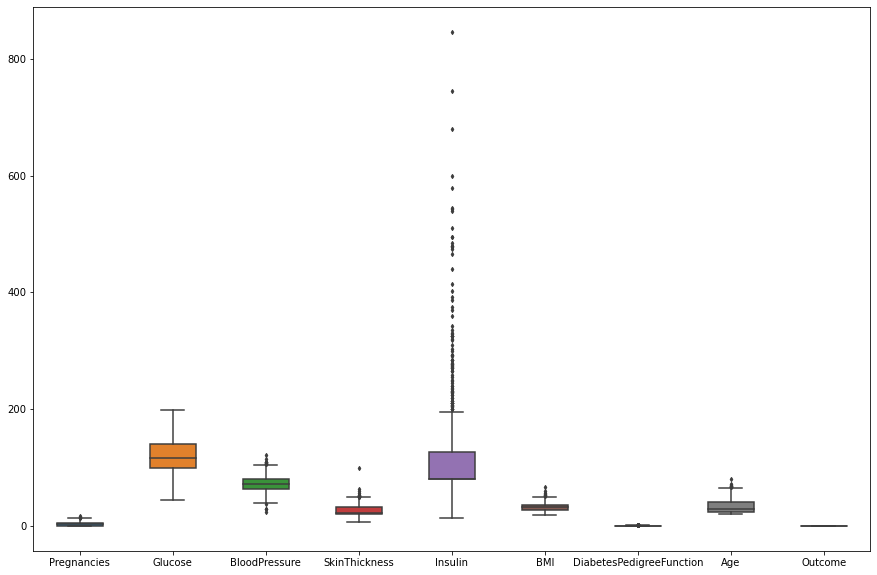

In [37]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

<AxesSubplot:ylabel='Count'>

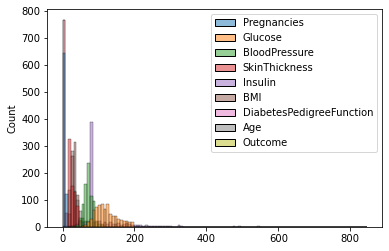

In [40]:
sns.histplot(df)

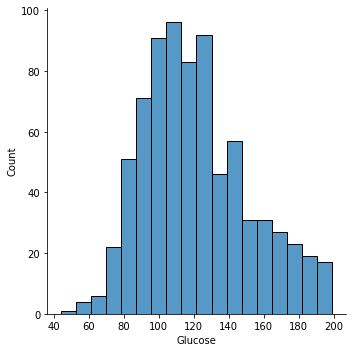

In [49]:
sns.displot(df['Glucose'])         #histogram

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

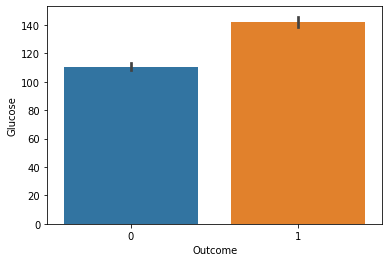

In [50]:
sns.barplot(x = df.Outcome , y = df.Glucose)

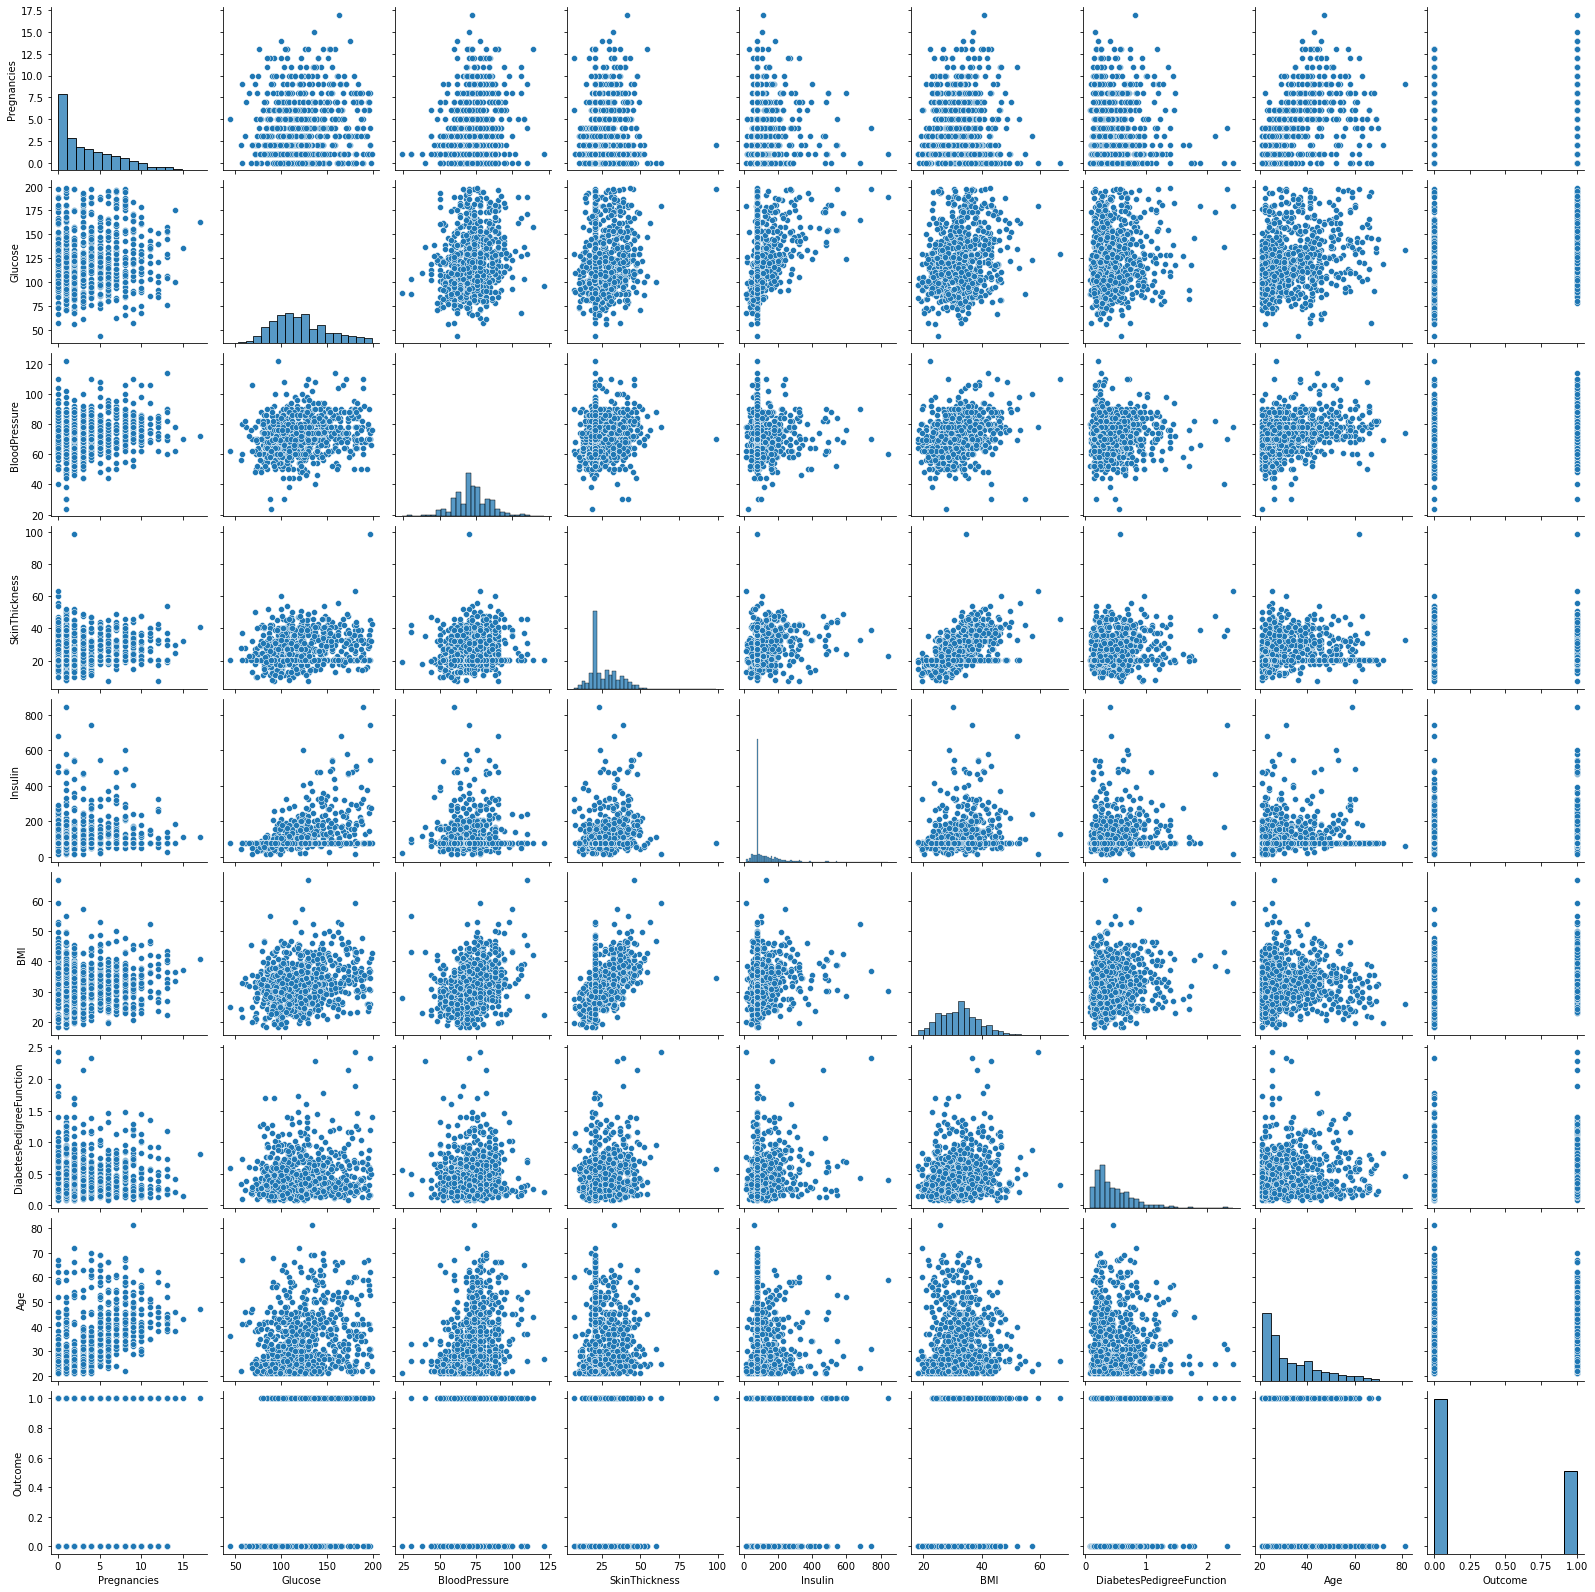

In [48]:
sns.pairplot(df)

#### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [51]:
## missing values
df[df.isnull().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


#### there are no missing values

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

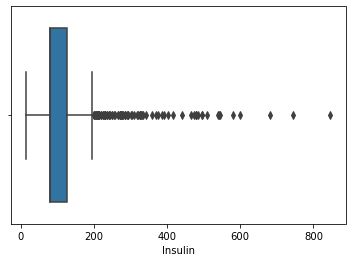

In [52]:
## Outliers

sns.boxplot(df['Insulin'])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies'>

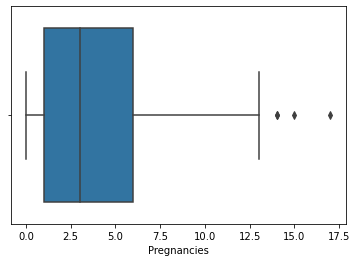

In [53]:
sns.boxplot(df['Pregnancies'])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose'>

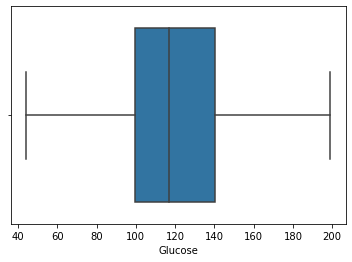

In [54]:
sns.boxplot(df['Glucose'])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BloodPressure'>

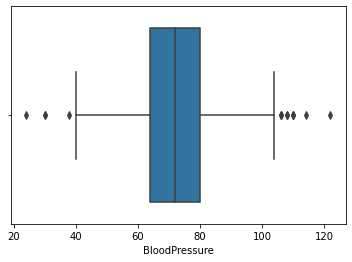

In [55]:
sns.boxplot(df['BloodPressure'])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SkinThickness'>

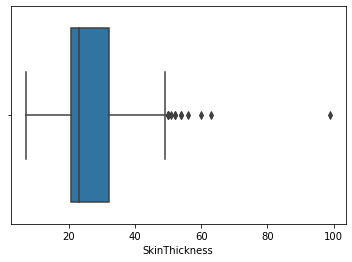

In [56]:
sns.boxplot(df['SkinThickness'])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

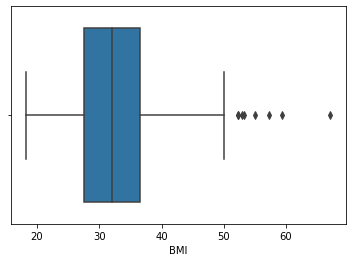

In [57]:
sns.boxplot(df['BMI'])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

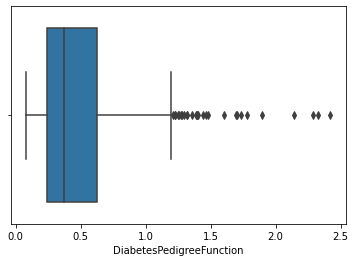

In [58]:
sns.boxplot(df['DiabetesPedigreeFunction'])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

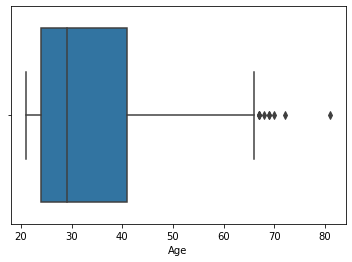

In [59]:
sns.boxplot(df['Age'])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


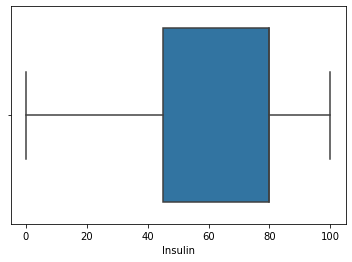

In [64]:
for i in df['Insulin']:
    q1=df['Insulin'].quantile(0.25)
    q3=df['Insulin'].quantile(0.75)
    iqr=q3-q1
    lower_tail= q1 - 1.5 * iqr
    upper_tail= q3 + 1.5 * iqr
    if i > upper_tail  or i < lower_tail:
        df['Insulin']=df['Insulin'].replace(i , 0)
sns.boxplot(df['Insulin'])
plt.show()

#### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [66]:
#segregate the dependent and independent variable
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

In [67]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [68]:
df.shape

(768, 9)

In [70]:
import random

random.seed(500)
print(random.randint(1,1000))

817


#### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [102]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')

In [103]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [104]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33
127,1,118.0,58.0,36.000000,0.000000,33.3,0.261,23
564,0,91.0,80.0,20.536458,79.799479,32.4,0.601,27
375,12,140.0,82.0,43.000000,0.000000,39.2,0.528,58
663,9,145.0,80.0,46.000000,89.233429,37.9,0.637,40


[Text(0.4044421487603306, 0.96875, 'x[1] <= 123.5\nentropy = 0.941\nsamples = 576\nvalue = [370, 206]'),
 Text(0.1284435261707989, 0.90625, 'x[5] <= 26.45\nentropy = 0.685\nsamples = 329\nvalue = [269, 60]'),
 Text(0.03305785123966942, 0.84375, 'x[3] <= 13.5\nentropy = 0.091\nsamples = 86\nvalue = [85, 1]'),
 Text(0.02203856749311295, 0.78125, 'x[6] <= 0.668\nentropy = 0.414\nsamples = 12\nvalue = [11, 1]'),
 Text(0.011019283746556474, 0.71875, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.03305785123966942, 0.71875, 'x[3] <= 10.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.02203856749311295, 0.65625, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0440771349862259, 0.65625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0440771349862259, 0.78125, 'entropy = 0.0\nsamples = 74\nvalue = [74, 0]'),
 Text(0.2238292011019284, 0.84375, 'x[7] <= 28.5\nentropy = 0.8\nsamples = 243\nvalue = [184, 59]'),
 Text(0.11019283746556474, 0.78125, 'x[5] <= 30.95\nent

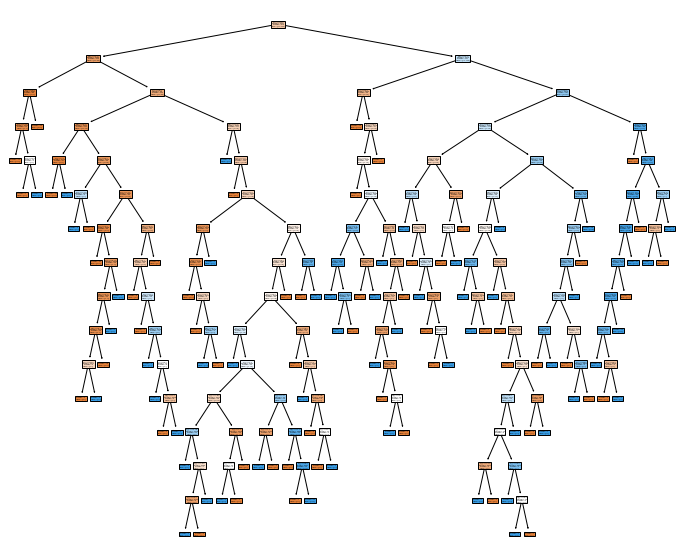

In [105]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

In [75]:
## prediction
y_pred=classifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score , classification_report
score = accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.7291666666666666
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       118
           1       0.68      0.57      0.62        74

    accuracy                           0.73       192
   macro avg       0.72      0.70      0.70       192
weighted avg       0.72      0.73      0.72       192



In [83]:
import warnings
warnings.filterwarnings('ignore')

In [84]:
parameter={'criterion':['gini','entropy','log_loss'],
          'splitter':['best','random'],
          'max_depth':[1,2,3,4,5],
          'max_features':['auto','sqrt','log2']}

In [85]:
from sklearn.model_selection import GridSearchCV
classifier=DecisionTreeClassifier()
clf=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')

In [87]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [88]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [89]:
y_pred=clf.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.6927083333333334
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       151
           1       0.35      0.54      0.43        41

    accuracy                           0.69       192
   macro avg       0.60      0.64      0.61       192
weighted avg       0.75      0.69      0.71       192



#### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [91]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[111,  19],
       [ 40,  22]], dtype=int64)

In [92]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [93]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.6927083333333334

In [94]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8538461538461538

In [95]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7350993377483444

In [96]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.790035587188612

#### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

#### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.